In [13]:
#import libraries
import pandas as pd #data manipulation
import numpy as np #numerical analysis
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [14]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [15]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [16]:
X_train.shape

(34799, 32, 32, 3)

In [17]:
y_train.shape

(34799,)

In [18]:
X_validation.shape

(4410, 32, 32, 3)

In [19]:
y_validation.shape

(4410,)

In [20]:
X_test.shape

(12630, 32, 32, 3)

1

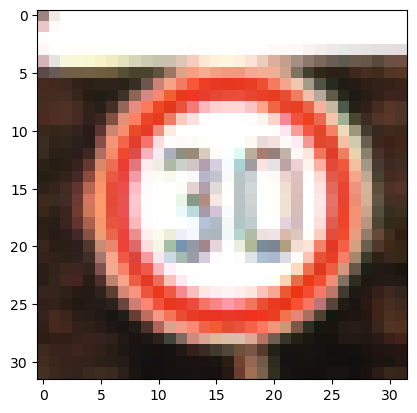

In [21]:
#image exploration
i = 3000
plt.imshow(X_train[i])
y_train[i]

17

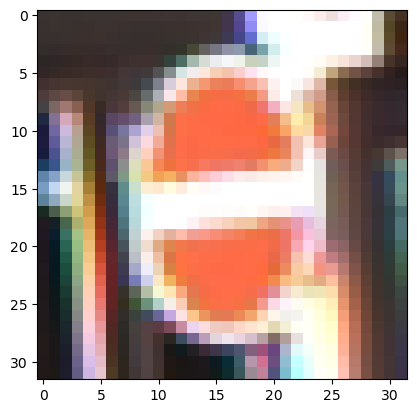

In [22]:
i = 4000
plt.imshow(X_validation[i])
y_validation[i]

34

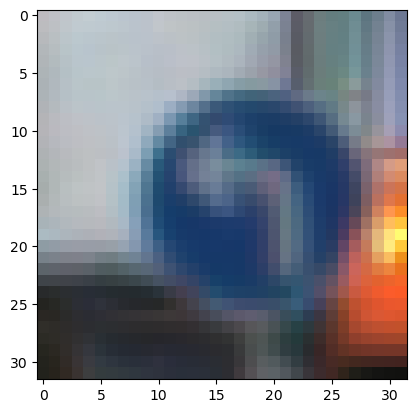

In [23]:
i = 2000
plt.imshow(X_test[i])
y_test[i]

In [24]:
#data preparation
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [25]:
#changing the color to gray
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [26]:
X_train_gray.shape

(34799, 32, 32, 1)

In [27]:
X_test_gray.shape

(12630, 32, 32, 1)

In [28]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [29]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [30]:
X_train_gray_norm

array([[[[-0.390625  ],
         [-0.33333333],
         [-0.32552083],
         ...,
         [-0.234375  ],
         [-0.39322917],
         [-0.46875   ]],

        [[-0.23958333],
         [-0.28385417],
         [-0.32291667],
         ...,
         [-0.20572917],
         [-0.30729167],
         [-0.40885417]],

        [[-0.05989583],
         [-0.0390625 ],
         [-0.18229167],
         ...,
         [-0.28645833],
         [-0.23177083],
         [-0.25260417]],

        ...,

        [[-0.1640625 ],
         [ 0.0390625 ],
         [ 0.359375  ],
         ...,
         [-0.65104167],
         [-0.65364583],
         [-0.65625   ]],

        [[-0.15625   ],
         [ 0.03125   ],
         [ 0.17708333],
         ...,
         [-0.6171875 ],
         [-0.63541667],
         [-0.67447917]],

        [[-0.140625  ],
         [-0.21875   ],
         [-0.1015625 ],
         ...,
         [-0.66927083],
         [-0.6796875 ],
         [-0.69270833]]],


       [[[ 0.38802083],


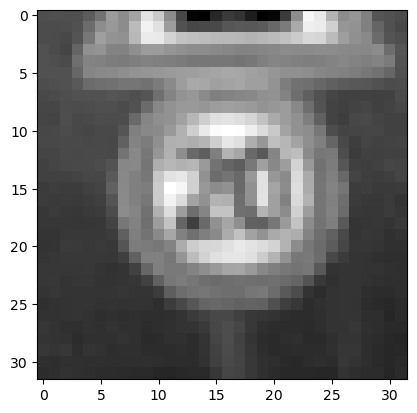

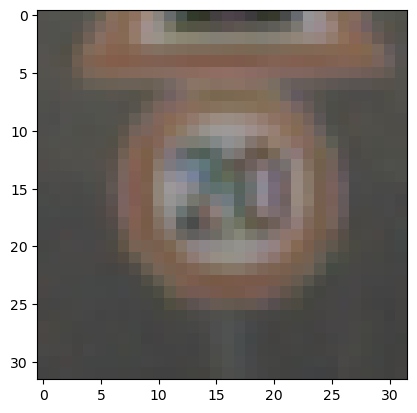

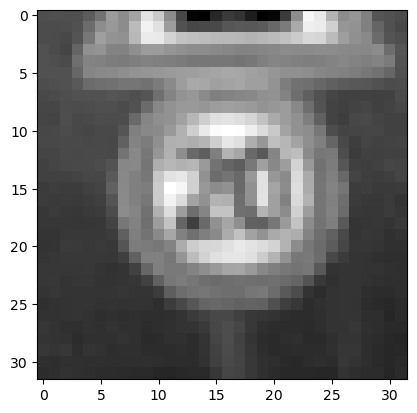

In [31]:
#did i preserve the actual features of the images?
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

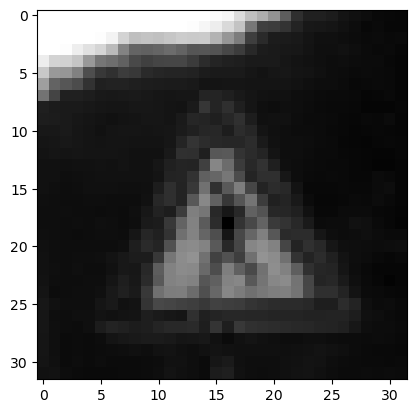

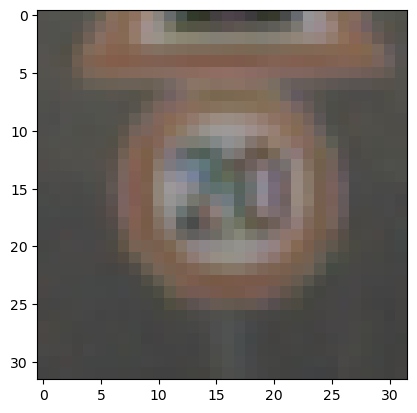

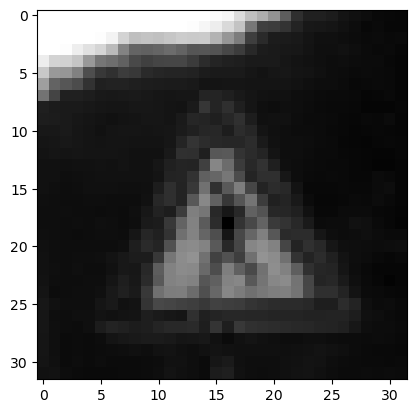

In [32]:
i = 610
plt.imshow(X_test_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')

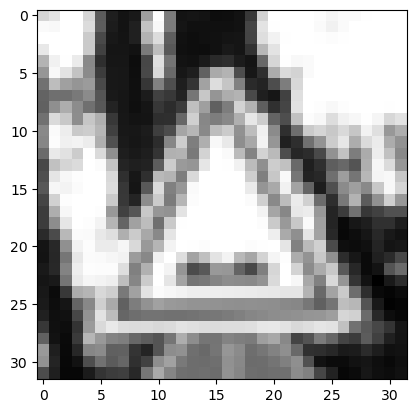

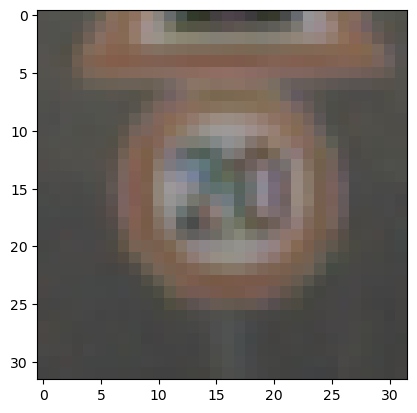

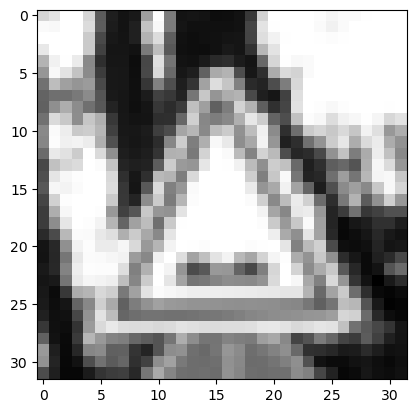

In [33]:
i = 610
plt.imshow(X_validation_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')

In [34]:
#convolutional layers 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [35]:
#build network
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=6,kernel_size=(5,5), activation = 'relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16,kernel_size=(5,5), activation = 'relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation='softmax')) #thats the output

In [37]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy']) #how fast

In [46]:
history = cnn_model.fit(X_train_gray_norm, 
              y_train, 
              batch_size=500,
              epochs=5,
              verbose =1,
              validation_data=(X_validation_gray_norm,y_validation))

Epoch 1/5
70/70 [==============================] - 3s 39ms/step - loss: 0.0122 - accuracy: 0.9971 - val_loss: 0.7461 - val_accuracy: 0.8773
Epoch 2/5
70/70 [==============================] - 3s 39ms/step - loss: 0.0144 - accuracy: 0.9963 - val_loss: 0.7963 - val_accuracy: 0.8707
Epoch 3/5
70/70 [==============================] - 3s 40ms/step - loss: 0.0144 - accuracy: 0.9964 - val_loss: 0.8103 - val_accuracy: 0.8696
Epoch 4/5
70/70 [==============================] - 3s 42ms/step - loss: 0.0124 - accuracy: 0.9967 - val_loss: 0.7452 - val_accuracy: 0.8891
Epoch 5/5
70/70 [==============================] - 3s 39ms/step - loss: 0.0088 - accuracy: 0.9984 - val_loss: 0.8048 - val_accuracy: 0.8760


In [47]:
#reached 85% accuracy above
history = cnn_model.fit(X_train_gray_norm, 
              y_train, 
              batch_size=500,
              epochs=50,
              verbose =1,
              validation_data=(X_validation_gray_norm,y_validation))


Epoch 1/50
70/70 [==============================] - 3s 41ms/step - loss: 0.0120 - accuracy: 0.9966 - val_loss: 0.8289 - val_accuracy: 0.8766
Epoch 2/50
70/70 [==============================] - 3s 41ms/step - loss: 0.0142 - accuracy: 0.9966 - val_loss: 0.7728 - val_accuracy: 0.8748
Epoch 3/50
70/70 [==============================] - 3s 39ms/step - loss: 0.0124 - accuracy: 0.9967 - val_loss: 0.7830 - val_accuracy: 0.8803
Epoch 4/50
70/70 [==============================] - 3s 43ms/step - loss: 0.0096 - accuracy: 0.9978 - val_loss: 0.8366 - val_accuracy: 0.8862
Epoch 5/50
70/70 [==============================] - 3s 42ms/step - loss: 0.0104 - accuracy: 0.9974 - val_loss: 0.8647 - val_accuracy: 0.8771
Epoch 6/50
70/70 [==============================] - 3s 44ms/step - loss: 0.0171 - accuracy: 0.9949 - val_loss: 0.9756 - val_accuracy: 0.8637
Epoch 7/50
70/70 [==============================] - 3s 40ms/step - loss: 0.0222 - accuracy: 0.9931 - val_loss: 0.8876 - val_accuracy: 0.8787
Epoch 8/50
70

In [48]:
#the accurary above reached 99%
score= cnn_model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 2ms/step - loss: 1.4537 - accuracy: 0.8867
Test Accuracy: 0.8866983652114868


In [49]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [51]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


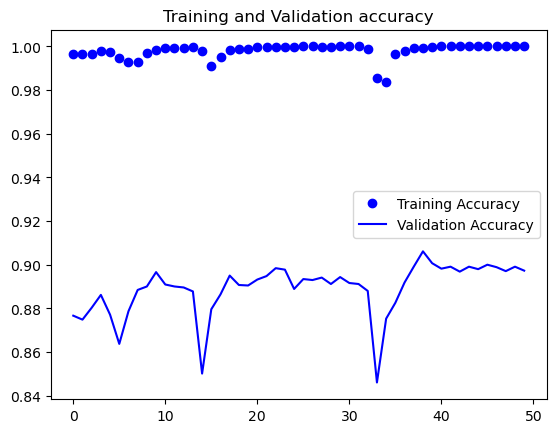

In [53]:
epochs=range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

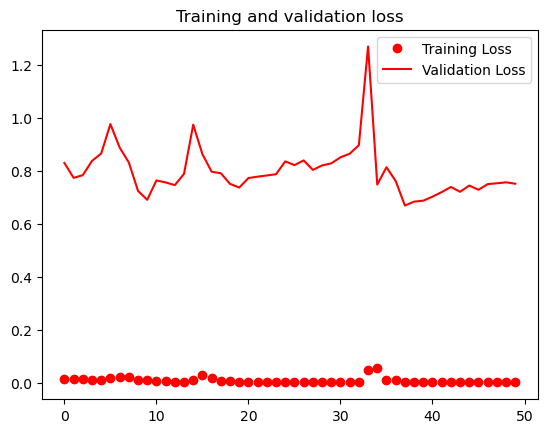

In [54]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [56]:
# Get the predictions for the test data
predictions = cnn_model.predict(X_test_gray_norm)

# Convert predictions to class indices
predicted_classes = np.argmax(predictions, axis=-1)

# Get the true labels for comparison
y_true = y_test


395/395 [==============================] - 1s 2ms/step


<Axes: >

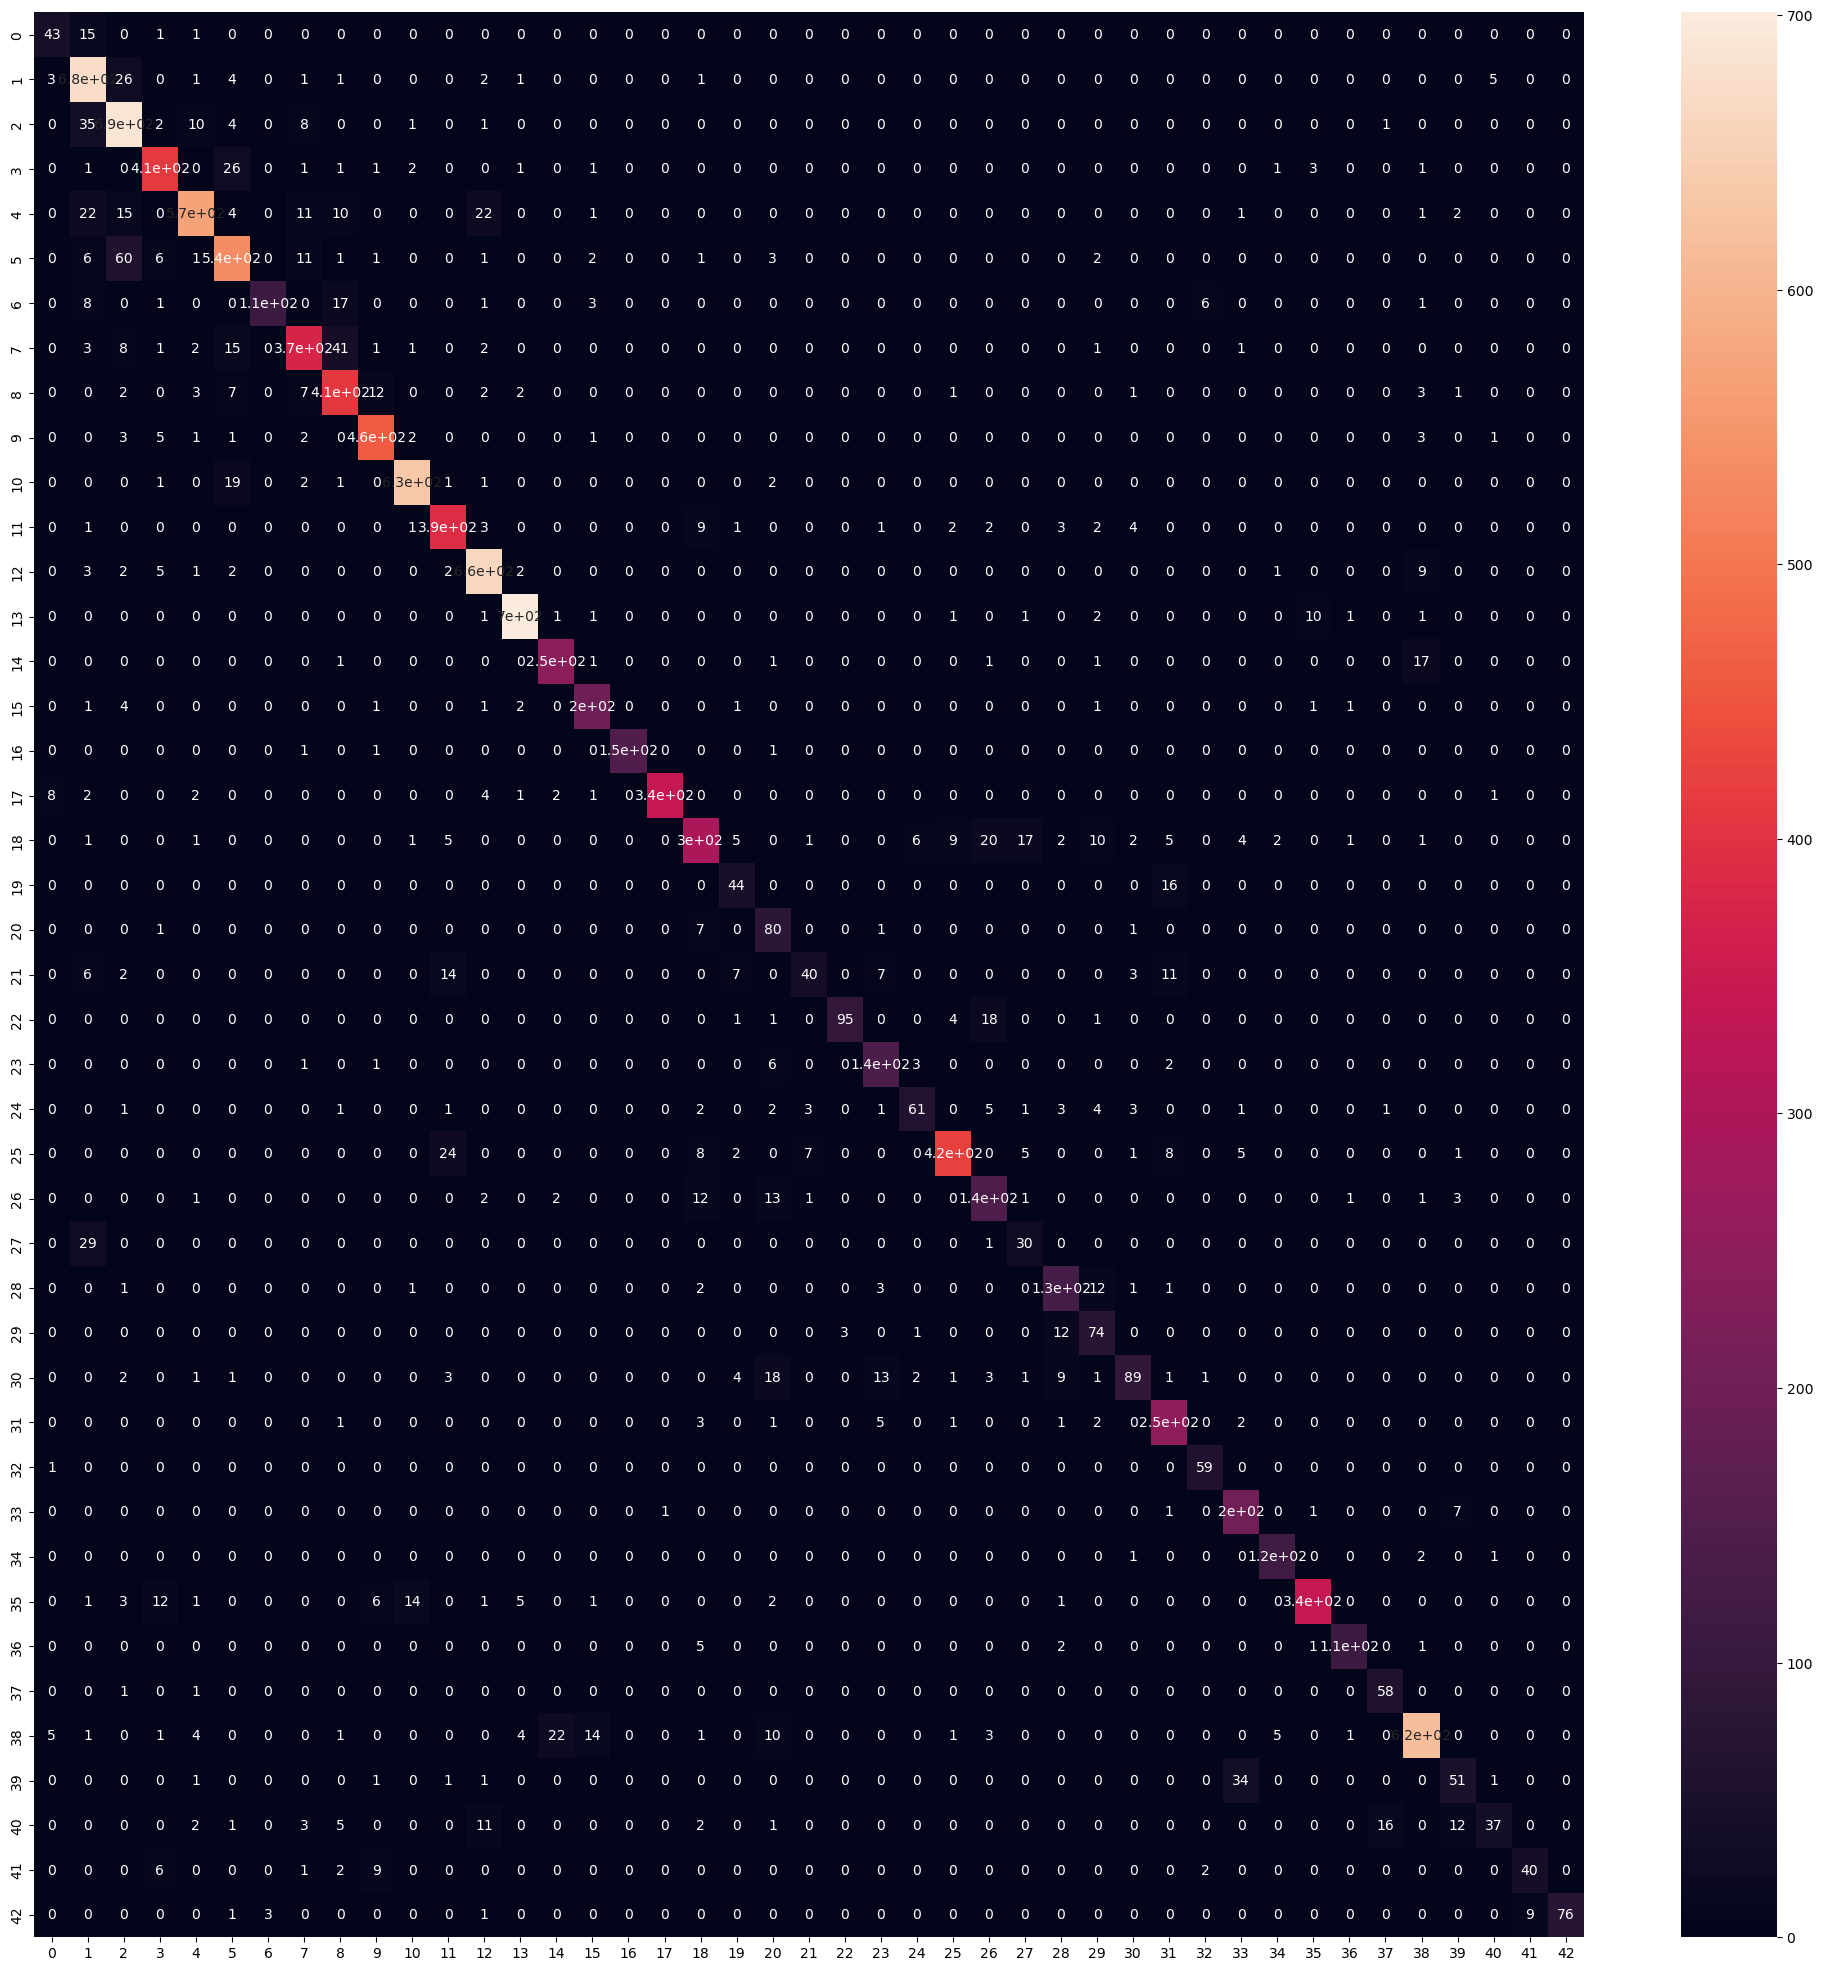

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

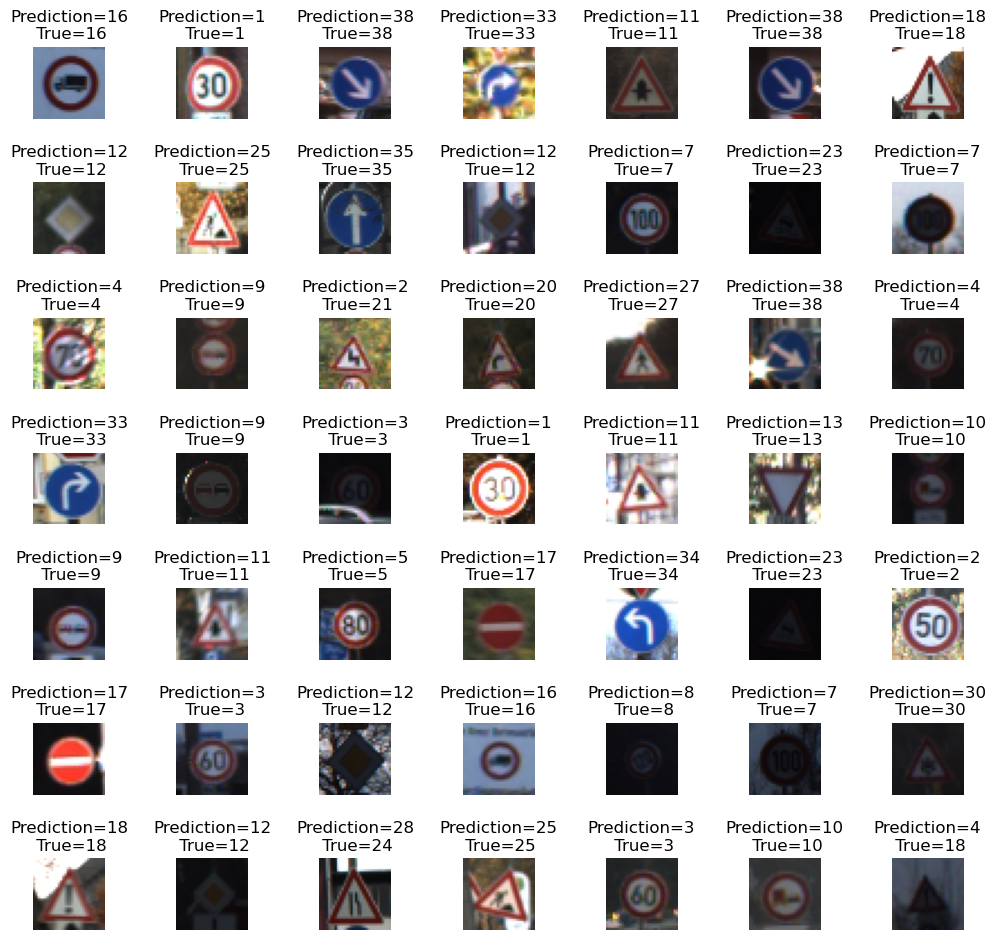

In [58]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)